# **# preprocessing step**





# **importing** **libraries**

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import string
import matplotlib as plot
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from gensim.models import Word2Vec
from bokeh.plotting import show, figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras import layers

**bold text**# loading files


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/ML_FOLDER/ai-project/ml/dataset/dataset.csv")
df.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


creating index part and comment part

In [5]:
with open('/content/drive/MyDrive/ML_FOLDER/ai-project/ml/dataset/dataset.csv', 'r', encoding='utf-8') as file:
    data = file.readlines()

# Create a DataFrame with index and text columns
df = pd.DataFrame({'index': range(len(data)), 'comment': data})

# Save the new DataFrame to a new CSV file
df.to_csv('indexed_comments.csv', index=False)

In [6]:
df['comment'][255]

'"Not good as Samsung quality products, earphone should be given with the phone."\n'

In [7]:
df['lower_case'] = df['comment'].str.lower()


removing punctuations

In [8]:
df['cleaned_comment'] = df['lower_case'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

In [9]:
df.head()

,index,comment,lower_case,cleaned_comment
0,0,review\n,review\n,review\n
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...
4,4,Good\n,good\n,good\n


tokenize the sentences and apply stemming using a lambda function

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
ps = PorterStemmer()
ps = PorterStemmer()
df['tokenized_comment'] = df['cleaned_comment'].apply(lambda x: word_tokenize(x))
df['stemmed_comment'] = df['tokenized_comment'].apply(lambda x: [ps.stem(word) for word in x])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
df.head()

,index,comment,lower_case,cleaned_comment,tokenized_comment,stemmed_comment
0,0,review\n,review\n,review\n,[review],[review]
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n,"[good, but, need, updates, and, improvements]","[good, but, need, updat, and, improv]"
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...,"[worst, mobile, i, have, bought, ever, battery...","[worst, mobil, i, have, bought, ever, batteri,..."
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...,"[when, i, will, get, my, 10, cash, back, its, ...","[when, i, will, get, my, 10, cash, back, it, a..."
4,4,Good\n,good\n,good\n,[good],[good]


In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
# Tokenize the sentences and apply lemmatization using lambda function
lemmatizer = WordNetLemmatizer()
df['lemmatized_comment'] = df['tokenized_comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,index,comment,lower_case,cleaned_comment,tokenized_comment,stemmed_comment,lemmatized_comment
0,0,review\n,review\n,review\n,[review],[review],[review]
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n,"[good, but, need, updates, and, improvements]","[good, but, need, updat, and, improv]","[good, but, need, update, and, improvement]"
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...,"[worst, mobile, i, have, bought, ever, battery...","[worst, mobil, i, have, bought, ever, batteri,...","[worst, mobile, i, have, bought, ever, battery..."
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...,"[when, i, will, get, my, 10, cash, back, its, ...","[when, i, will, get, my, 10, cash, back, it, a...","[when, i, will, get, my, 10, cash, back, it, a..."
4,4,Good\n,good\n,good\n,[good],[good],[good]


# now we going to divide our comments to positive and negetive

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [14]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(tokens):
    scores = sid.polarity_scores(' '.join(tokens))
    return scores['compound']

df['sentiment_score'] = df['tokenized_comment'].apply(get_sentiment_score)

df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')
df['sentiment_round'] = df['sentiment_score'].apply(lambda x: 1 if x >= 0 else 0)

In [15]:
df.head()

,index,comment,lower_case,cleaned_comment,tokenized_comment,stemmed_comment,lemmatized_comment,sentiment_score,sentiment,sentiment_round
0,0,review\n,review\n,review\n,[review],[review],[review],0.0000,positive,1
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n,"[good, but, need, updates, and, improvements]","[good, but, need, updat, and, improv]","[good, but, need, update, and, improvement]",0.5994,positive,1
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...,"[worst, mobile, i, have, bought, ever, battery...","[worst, mobil, i, have, bought, ever, batteri,...","[worst, mobile, i, have, bought, ever, battery...",-0.8720,negative,0
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...,"[when, i, will, get, my, 10, cash, back, its, ...","[when, i, will, get, my, 10, cash, back, it, a...","[when, i, will, get, my, 10, cash, back, it, a...",0.0000,positive,1
4,4,Good\n,good\n,good\n,[good],[good],[good],0.4404,positive,1


<Axes: >

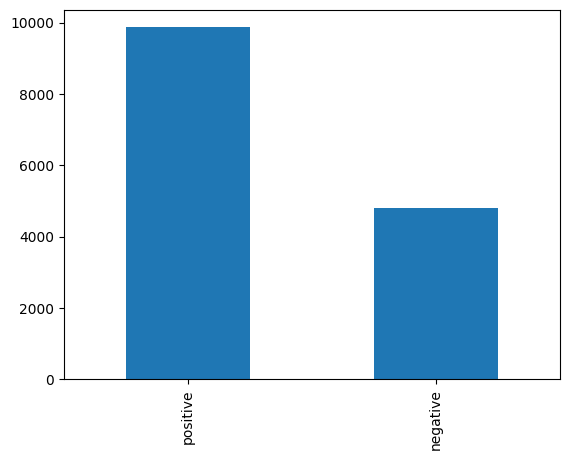

In [16]:
df['sentiment'].value_counts().plot.bar()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               14676 non-null  int64  
 1   comment             14676 non-null  object 
 2   lower_case          14676 non-null  object 
 3   cleaned_comment     14676 non-null  object 
 4   tokenized_comment   14676 non-null  object 
 5   stemmed_comment     14676 non-null  object 
 6   lemmatized_comment  14676 non-null  object 
 7   sentiment_score     14676 non-null  float64
 8   sentiment           14676 non-null  object 
 9   sentiment_round     14676 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.1+ MB


# **vectorizing using word2vec**





In [18]:
import gensim
from sklearn.model_selection import train_test_split
import numpy as np

word2vec_model = gensim.models.Word2Vec(df['lemmatized_comment'], vector_size=128, window=10, min_count=4, workers=4)

# Vectorize the lemmatized comments
def vectorize_comment(comment, model):
    vectorized = []
    for word in comment:
        if word in model.wv.key_to_index:
            vectorized.append(model.wv[word])
    if len(vectorized) > 0:
        return np.mean(vectorized, axis=0)
    else:
        return np.zeros(model.vector_size)


X = np.array([vectorize_comment(comment, word2vec_model) for comment in df['lemmatized_comment']])

y = df['sentiment_round']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
import tensorflow

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# **ANN**

Epoch 1/6
322/322 [==============================] - 9s 9ms/step - loss: 0.4639 - accuracy: 0.7522 - val_loss: 0.4171 - val_accuracy: 0.7981
Epoch 2/6
322/322 [==============================] - 3s 8ms/step - loss: 0.4210 - accuracy: 0.7878 - val_loss: 0.3970 - val_accuracy: 0.8013
Epoch 3/6
322/322 [==============================] - 3s 8ms/step - loss: 0.4072 - accuracy: 0.7935 - val_loss: 0.3903 - val_accuracy: 0.8106
Epoch 4/6
322/322 [==============================] - 3s 9ms/step - loss: 0.3995 - accuracy: 0.7984 - val_loss: 0.3860 - val_accuracy: 0.8072
Epoch 5/6
322/322 [==============================] - 3s 8ms/step - loss: 0.3938 - accuracy: 0.8013 - val_loss: 0.3841 - val_accuracy: 0.8083
Epoch 6/6
138/138 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8117
Test accuracy: 0.81


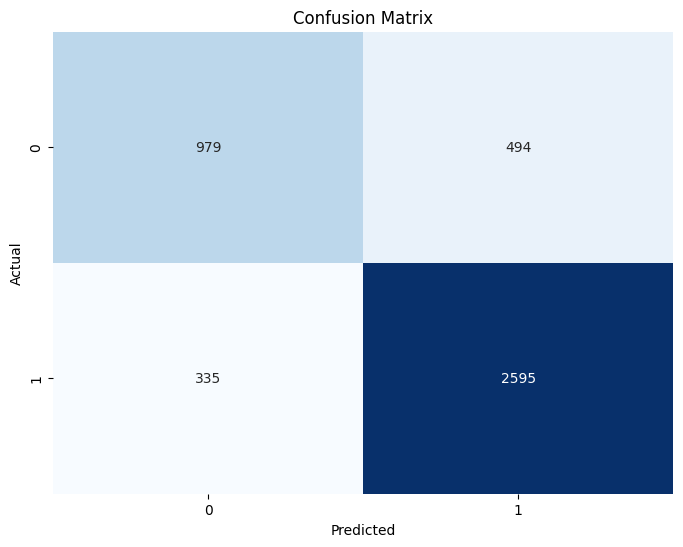

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1473
           1       0.84      0.89      0.86      2930

    accuracy                           0.81      4403
   macro avg       0.79      0.78      0.78      4403
weighted avg       0.81      0.81      0.81      4403



In [21]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h1 = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


# **Set hyperparameters**

Epoch 1/10
81/81 [==============================] - 6s 14ms/step - loss: 0.4872 - accuracy: 0.7447 - val_loss: 0.4153 - val_accuracy: 0.7883
Epoch 2/10
81/81 [==============================] - 1s 9ms/step - loss: 0.4261 - accuracy: 0.7802 - val_loss: 0.3915 - val_accuracy: 0.8033
Epoch 3/10
81/81 [==============================] - 1s 9ms/step - loss: 0.4048 - accuracy: 0.7950 - val_loss: 0.3968 - val_accuracy: 0.7988
Epoch 4/10
81/81 [==============================] - 1s 9ms/step - loss: 0.3968 - accuracy: 0.7992 - val_loss: 0.4435 - val_accuracy: 0.8033
Epoch 5/10
81/81 [==============================] - 1s 9ms/step - loss: 0.3905 - accuracy: 0.8005 - val_loss: 0.3987 - val_accuracy: 0.8092
Epoch 6/10
81/81 [==============================] - 1s 10ms/step - loss: 0.3890 - accuracy: 0.8049 - val_loss: 0.4209 - val_accuracy: 0.7770
Epoch 7/10
81/81 [==============================] - 1s 9ms/step - loss: 0.4000 - accuracy: 0.7939 - val_loss: 0.3951 - val_accuracy: 0.7960
Epoch 8/10
81/81 [

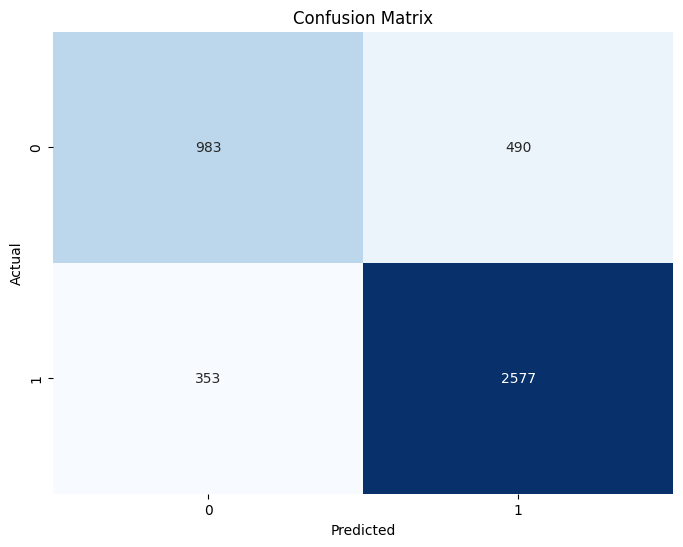

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1473
           1       0.84      0.88      0.86      2930

    accuracy                           0.81      4403
   macro avg       0.79      0.77      0.78      4403
weighted avg       0.81      0.81      0.81      4403



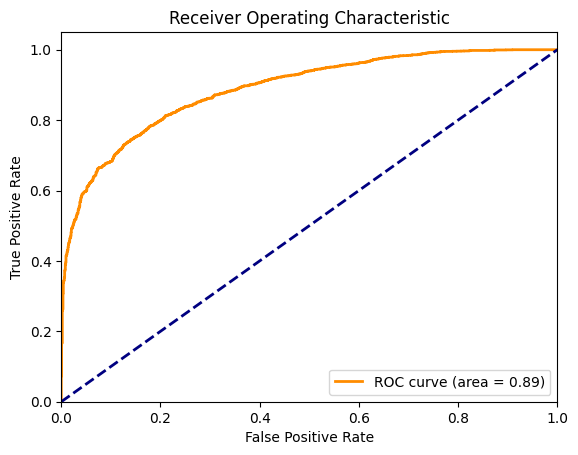

F1 Score: 0.8594297148574288


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h2 = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

# **CNN**

Epoch 1/10
81/81 [==============================] - 4s 14ms/step - loss: 0.5237 - accuracy: 0.7042 - val_loss: 0.4526 - val_accuracy: 0.7724
Epoch 2/10
81/81 [==============================] - 1s 7ms/step - loss: 0.4528 - accuracy: 0.7656 - val_loss: 0.4212 - val_accuracy: 0.7915
Epoch 3/10
81/81 [==============================] - 1s 7ms/step - loss: 0.4276 - accuracy: 0.7835 - val_loss: 0.4068 - val_accuracy: 0.7981
Epoch 4/10
81/81 [==============================] - 1s 8ms/step - loss: 0.4149 - accuracy: 0.7879 - val_loss: 0.4121 - val_accuracy: 0.7951
Epoch 5/10
81/81 [==============================] - 1s 8ms/step - loss: 0.4081 - accuracy: 0.7956 - val_loss: 0.4071 - val_accuracy: 0.7911
Epoch 6/10
81/81 [==============================] - 1s 7ms/step - loss: 0.3959 - accuracy: 0.7988 - val_loss: 0.4098 - val_accuracy: 0.7881
Epoch 7/10
81/81 [==============================] - 1s 9ms/step - loss: 0.3912 - accuracy: 0.8017 - val_loss: 0.3928 - val_accuracy: 0.8038
Epoch 8/10
81/81 [=

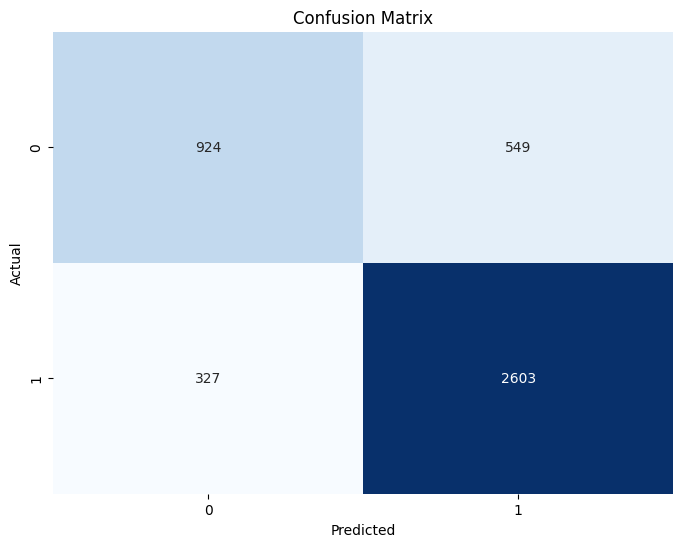

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1473
           1       0.83      0.89      0.86      2930

    accuracy                           0.80      4403
   macro avg       0.78      0.76      0.77      4403
weighted avg       0.80      0.80      0.80      4403



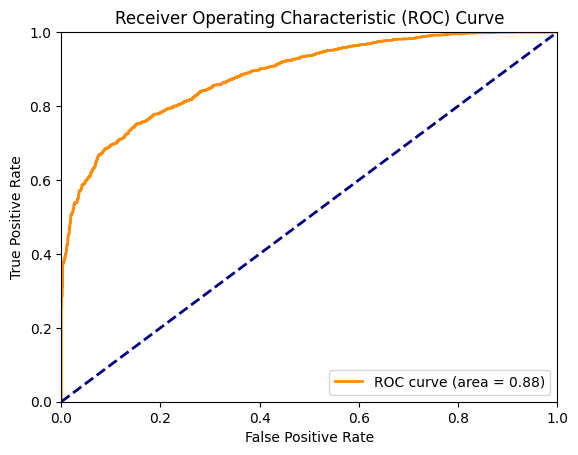

AUC: 0.8839896290220557


In [23]:
model = keras.Sequential([
    layers.Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

h3 = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f"AUC: {roc_auc}")


# **RNN**

Epoch 1/10
81/81 [==============================] - 20s 209ms/step - loss: 0.5222 - accuracy: 0.7088 - val_loss: 0.4576 - val_accuracy: 0.7536
Epoch 2/10
81/81 [==============================] - 17s 211ms/step - loss: 0.4885 - accuracy: 0.7264 - val_loss: 0.4512 - val_accuracy: 0.7606
Epoch 3/10
81/81 [==============================] - 20s 244ms/step - loss: 0.4789 - accuracy: 0.7412 - val_loss: 0.4809 - val_accuracy: 0.7209
Epoch 4/10
81/81 [==============================] - 19s 239ms/step - loss: 0.4849 - accuracy: 0.7315 - val_loss: 0.4665 - val_accuracy: 0.7543
Epoch 5/10
81/81 [==============================] - 17s 207ms/step - loss: 0.4768 - accuracy: 0.7420 - val_loss: 0.4538 - val_accuracy: 0.7422
Epoch 6/10
81/81 [==============================] - 18s 220ms/step - loss: 0.4740 - accuracy: 0.7401 - val_loss: 0.4434 - val_accuracy: 0.7706
Epoch 7/10
81/81 [==============================] - 18s 228ms/step - loss: 0.4738 - accuracy: 0.7442 - val_loss: 0.4347 - val_accuracy: 0.7804

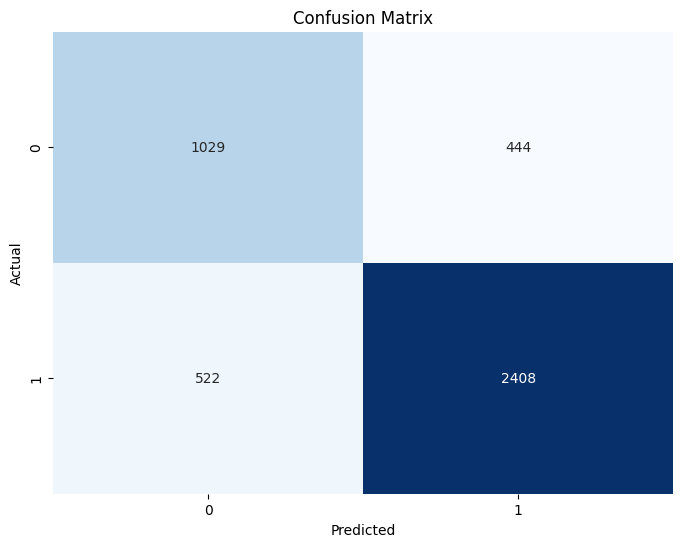

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1473
           1       0.84      0.82      0.83      2930

    accuracy                           0.78      4403
   macro avg       0.75      0.76      0.76      4403
weighted avg       0.78      0.78      0.78      4403



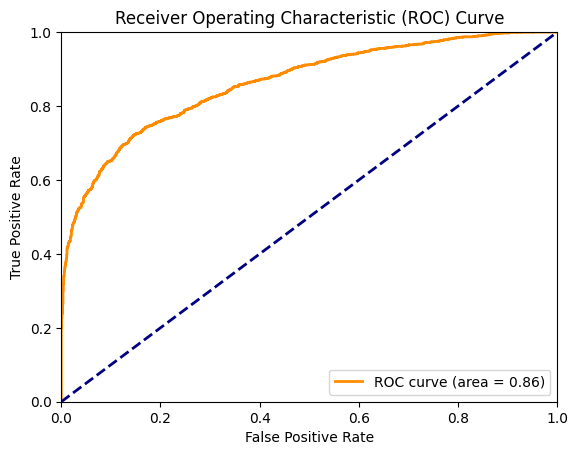

AUC: 0.8627984031103666


In [24]:
n_rnn = 64
drop_rnn = 0.2


model = keras.Sequential([
    layers.SimpleRNN(n_rnn, dropout=drop_rnn, input_shape=(X_train.shape[1], 1), return_sequences=True),
    layers.SimpleRNN(n_rnn),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

h4 = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f"AUC: {roc_auc}")

# **LSTM**

Epoch 1/10
81/81 [==============================] - 6s 25ms/step - loss: 0.6191 - accuracy: 0.6803 - val_loss: 0.5999 - val_accuracy: 0.6829
Epoch 2/10
81/81 [==============================] - 1s 15ms/step - loss: 0.5545 - accuracy: 0.6862 - val_loss: 0.5028 - val_accuracy: 0.7075
Epoch 3/10
81/81 [==============================] - 1s 15ms/step - loss: 0.5176 - accuracy: 0.7016 - val_loss: 0.5043 - val_accuracy: 0.7254
Epoch 4/10
81/81 [==============================] - 1s 17ms/step - loss: 0.5139 - accuracy: 0.7088 - val_loss: 0.4986 - val_accuracy: 0.7313
Epoch 5/10
81/81 [==============================] - 2s 20ms/step - loss: 0.5067 - accuracy: 0.7161 - val_loss: 0.4914 - val_accuracy: 0.7409
Epoch 6/10
81/81 [==============================] - 1s 16ms/step - loss: 0.5150 - accuracy: 0.7052 - val_loss: 0.5195 - val_accuracy: 0.7236
Epoch 7/10
81/81 [==============================] - 1s 15ms/step - loss: 0.5035 - accuracy: 0.7199 - val_loss: 0.4937 - val_accuracy: 0.7386
Epoch 8/10
81

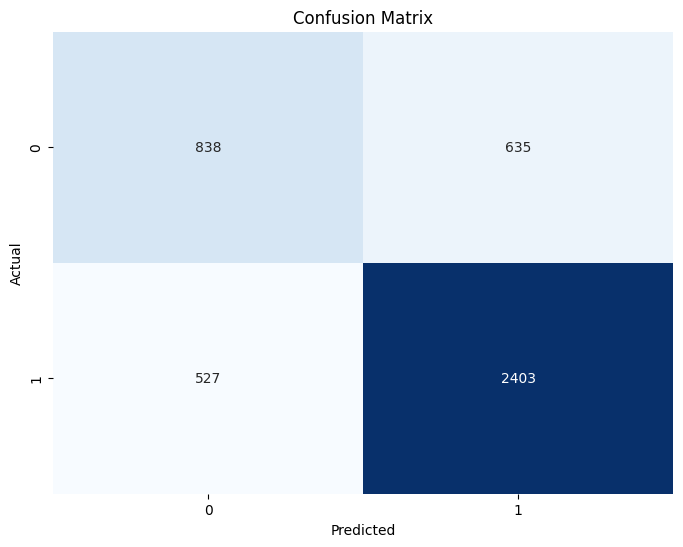

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1473
           1       0.79      0.82      0.81      2930

    accuracy                           0.74      4403
   macro avg       0.70      0.69      0.70      4403
weighted avg       0.73      0.74      0.73      4403



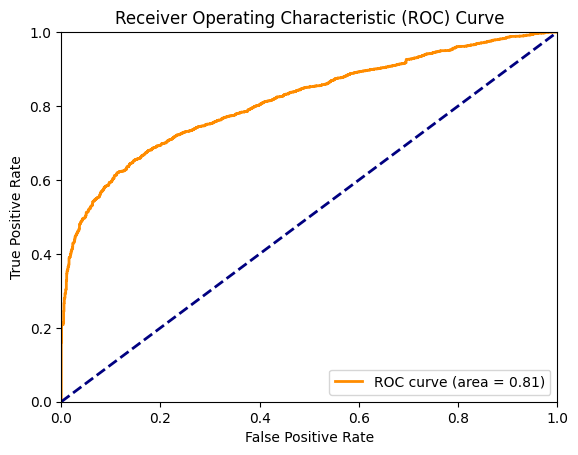

AUC: 0.8148388860698489


In [25]:
model = keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h5 = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))



loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Print AUC
print(f"AUC: {roc_auc}")